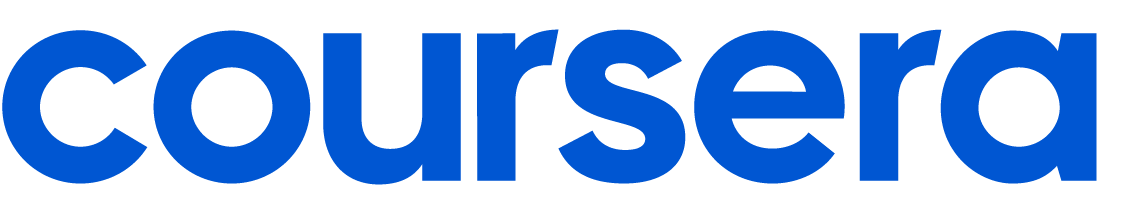

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [13]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
# Import any other packages you may want to use


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [15]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [16]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No


# EDA Visual the train dataset

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [18]:
train_df.drop("LoanID", inplace=True, axis=1) # drop LoanID , not useful for training ML model
train_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [27]:
train_df.isna().sum() # check for missing values

Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

### Select default is 1 or 0 for analysis

In [20]:
yesDefault = train_df[train_df["Default"] == 1]
noDefault = train_df[train_df["Default"] == 0]

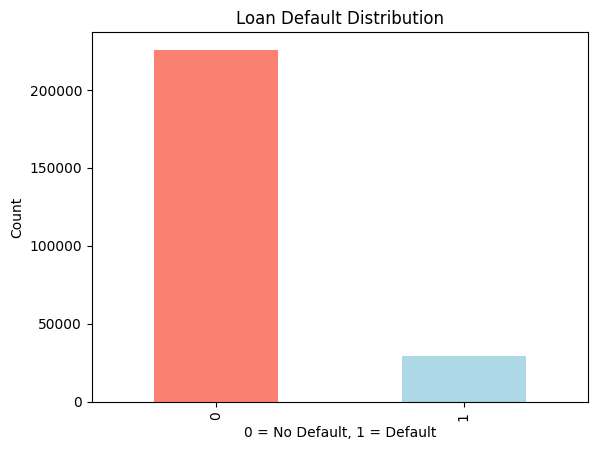

In [25]:
# seem the data is extremely imbalanced
train_df["Default"].value_counts().plot(kind="bar", 
                                        color=["salmon", "lightblue"], title="Loan Default Distribution", 
                                        xlabel="0 = No Default, 1 = Default",
                                        ylabel="Count");

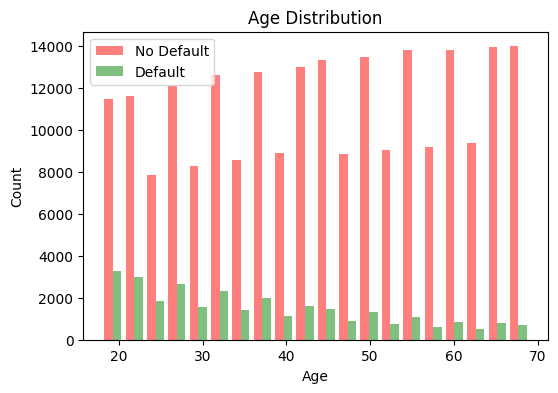

In [51]:
plt.figure(figsize=(6, 4))
plt.hist([noDefault["Age"], yesDefault["Age"]], bins=20, alpha=0.5, color=["red", "green"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.title("Age Distribution");


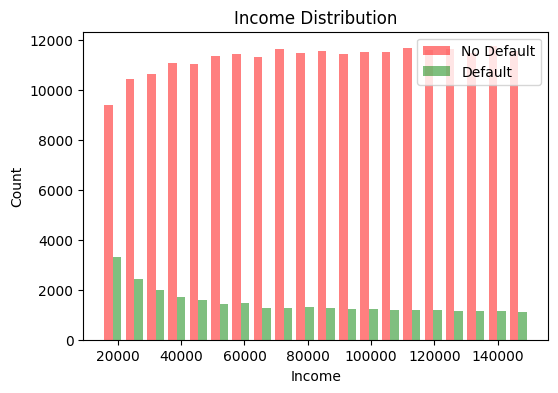

In [53]:
# Lower income more loan default cases
plt.figure(figsize=(6, 4))
plt.hist([noDefault["Income"], yesDefault["Income"]], bins=20, alpha=0.5, color=["red", "green"])
plt.xlabel("Income")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.title("Income Distribution");


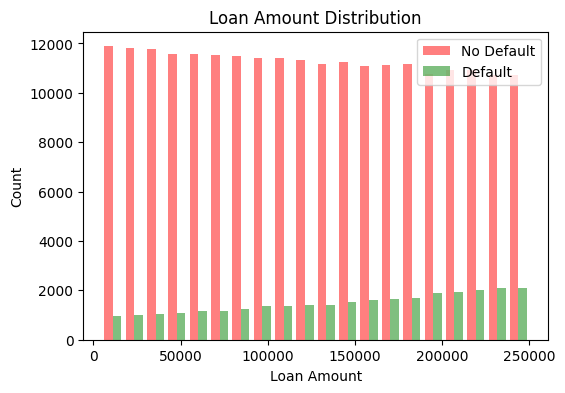

In [55]:
# Loan Amount large more loan default cases
plt.figure(figsize=(6, 4))
plt.hist([noDefault["LoanAmount"], yesDefault["LoanAmount"]], bins=20, alpha=0.5, color=["red", "green"])
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.title("Loan Amount Distribution");

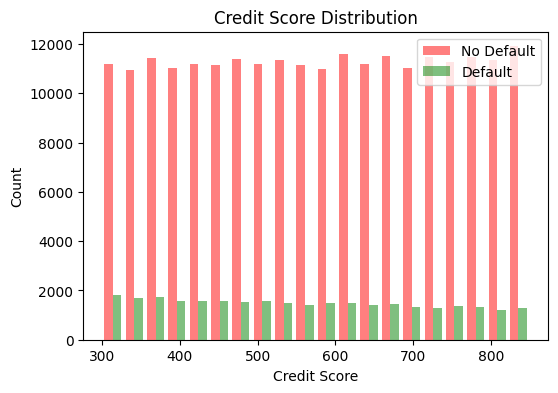

In [56]:

plt.figure(figsize=(6, 4))
plt.hist([noDefault["CreditScore"], yesDefault["CreditScore"]], bins=20, alpha=0.5, color=["red", "green"])
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.title("Credit Score Distribution");

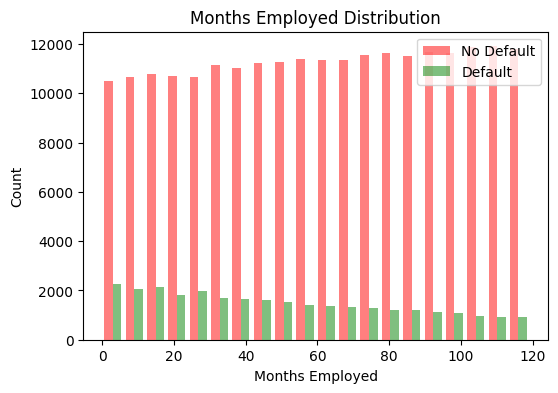

In [57]:

plt.figure(figsize=(6, 4))
plt.hist([noDefault["MonthsEmployed"], yesDefault["MonthsEmployed"]], bins=20, alpha=0.5, color=["red", "green"])
plt.xlabel("Months Employed")
plt.ylabel("Count")
plt.legend(["No Default", "Default"])
plt.title("Months Employed Distribution");

In [37]:
def printColumnValue(df, showAll=True):
    for column in df.columns:
        if showAll:
            print(f"{column}: {df[column].unique()}")
        else:
            if df[column].dtype == "object": # only show object type columns unique values
                print(f"{column}: {df[column].unique()}")

In [39]:
printColumnValue(train_df , showAll=True)

Age: [56 69 46 32 60 25 38 36 40 28 41 53 57 20 39 19 61 47 55 50 29 42 66 44
 59 45 33 64 68 54 24 26 35 21 31 67 43 37 52 34 23 51 27 48 65 62 58 18
 22 30 49 63]
Income: [ 85994  50432  84208 ... 104108  76558 124446]
LoanAmount: [ 50587 124440 129188 ... 105905 168231 208294]
CreditScore: [520 458 451 743 633 720 429 531 827 480 652 375 829 395 635 432 313 811
 319 376 419 583 528 468 839 343 514 462 580 604 551 840 787 607 669 506
 540 695 707 386 747 400 639 795 498 560 505 393 369 439 634 657 417 455
 351 655 737 771 775 680 694 534 529 416 318 411 802 305 674 585 750 303
 487 730 579 658 683 574 421 719 692 542 453 618 659 371 517 701 361 578
 656 553 734 346 584 481 447 691 457 616 564 315 436 533 372 394 834 339
 415 668 748 715 479 696 751 842 769 577 602 497 714 396 513 522 335 601
 499 380 640 566 627 786 524 449 489 401 666 818 841 406 508 749 620 536
 592 541 316 609 705 424 770 407 611 398 739 777 763 826 726 310 815 797
 317 626 708 334 434 381 552 347 413 338 760 740 

In [67]:
train_df.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

## Clean Data
#### Convert yes or no unique values to 1 or 0 , convert non numeric column into One Hot Encoding 

In [68]:
# define yes and no for convert to binary columns
yesNoColumns = ["HasMortgage","HasDependents", "HasCoSigner"]
# define several columns for  convert one hot encoding
columnsForOneHotEncoding = ["Education", "EmploymentType", "MaritalStatus", "LoanPurpose"]
# define the columns to be scaled
columnsToScale = ["Age","Income", "LoanAmount", "CreditScore", "MonthsEmployed", 
                  "NumCreditLines", "InterestRate", "LoanTerm" , "DTIRatio"]


In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
def preprocessData(df, scale=True):
    # Convert Yes and No to 1 and 0
    for column in yesNoColumns:
        df[column] = df[column].apply(lambda x: 1 if x == "Yes" else 0)
    
    # Convert to one hot encoding
    df = pd.get_dummies(df, columns=columnsForOneHotEncoding, dtype=int)
    
    if scale:
        # Scale the columns
        scaler = MinMaxScaler() # StandardScaler() 
        df[columnsToScale] = scaler.fit_transform(df[columnsToScale])
    
    return df

In [71]:
train_df = preprocessData(train_df)
train_df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,0.745098,0.525885,0.186070,0.400729,0.672269,1.000000,0.575217,0.50,0.4250,1,...,0,0,1,0,0,0,0,0,0,1
1,1.000000,0.262461,0.487512,0.287796,0.126050,0.000000,0.122174,1.00,0.7250,0,...,0,0,0,1,0,0,0,0,0,1
2,0.549020,0.512656,0.506892,0.275046,0.218487,0.666667,0.833478,0.25,0.2625,1,...,0,1,1,0,0,1,0,0,0,0
3,0.274510,0.123801,0.162446,0.806922,0.000000,0.666667,0.220435,0.25,0.1625,0,...,0,0,0,1,0,0,1,0,0,0
4,0.823529,0.040274,0.016894,0.606557,0.067227,1.000000,0.196087,0.75,0.7875,0,...,0,1,1,0,0,1,0,0,0,0


In [74]:
printColumnValue(train_df, showAll=True) # check converted numeric values

Age: [0.74509804 1.         0.54901961 0.2745098  0.82352941 0.1372549
 0.39215686 0.35294118 0.43137255 0.19607843 0.45098039 0.68627451
 0.76470588 0.03921569 0.41176471 0.01960784 0.84313725 0.56862745
 0.7254902  0.62745098 0.21568627 0.47058824 0.94117647 0.50980392
 0.80392157 0.52941176 0.29411765 0.90196078 0.98039216 0.70588235
 0.11764706 0.15686275 0.33333333 0.05882353 0.25490196 0.96078431
 0.49019608 0.37254902 0.66666667 0.31372549 0.09803922 0.64705882
 0.17647059 0.58823529 0.92156863 0.8627451  0.78431373 0.
 0.07843137 0.23529412 0.60784314 0.88235294]
Income: [0.52588538 0.2624612  0.51265565 ... 0.66006415 0.45598856 0.81071712]
LoanAmount: [0.18607015 0.48751219 0.50689186 ... 0.41185882 0.6662517  0.82977482]
CreditScore: [0.4007286  0.28779599 0.27504554 0.80692168 0.60655738 0.76502732
 0.23497268 0.42076503 0.95992714 0.32786885 0.64116576 0.13661202
 0.96357013 0.17304189 0.61020036 0.24043716 0.02367942 0.93078324
 0.03460838 0.13843352 0.21675774 0.5154827 

In [90]:
test_df = preprocessData(test_df)
test_df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,EmploymentType_Self-employed,EmploymentType_Unemployed,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,7RYZGMKJIR,0.274510,0.864040,0.158351,0.914390,0.193277,0.333333,0.178261,0.25,0.0375,...,0,0,1,0,0,0,0,0,0,1
1,JDL5RH07AM,0.843137,0.883797,0.054695,0.125683,0.731092,0.333333,0.477826,1.00,0.6125,...,1,0,0,0,1,0,1,0,0,0
2,STAL716Y79,0.725490,0.746733,0.599087,0.479053,0.025210,0.666667,0.152609,0.75,0.9000,...,0,0,0,0,1,0,0,0,0,1
3,SO0KKJ3IQB,0.784314,0.592366,0.207300,0.067395,0.201681,0.000000,0.953478,0.50,0.8375,...,0,1,1,0,0,0,1,0,0,0
4,T99CWTYDCP,0.882353,0.420190,0.754291,0.275046,0.436975,0.666667,0.871739,0.75,0.4250,...,0,1,0,0,1,1,0,0,0,0


## Use over sampling method to make training data balanced 

In [75]:
# !pip install imbalanced-learn for SMOTE package
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
y = train_df["Default"]
x = train_df.drop("Default", axis=1)


In [76]:
smt = SMOTE()
xTrainSM, yTrainSM = smt.fit_resample(x, y)

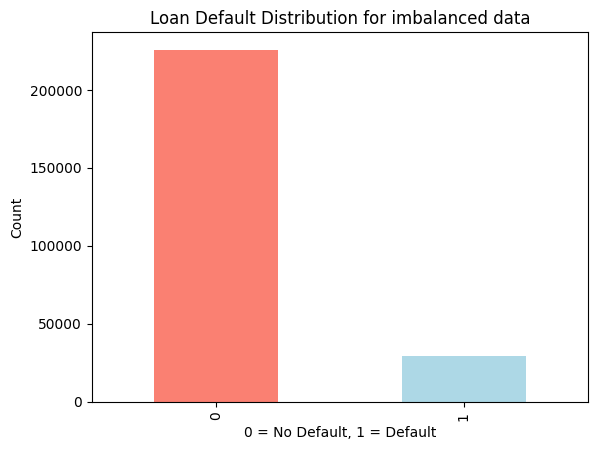

In [82]:
# seem the data is extremely imbalanced
train_df["Default"].value_counts().plot(kind="bar", 
                                        color=["salmon", "lightblue"], title="Loan Default Distribution for imbalanced data", 
                                        xlabel="0 = No Default, 1 = Default",
                                        ylabel="Count");

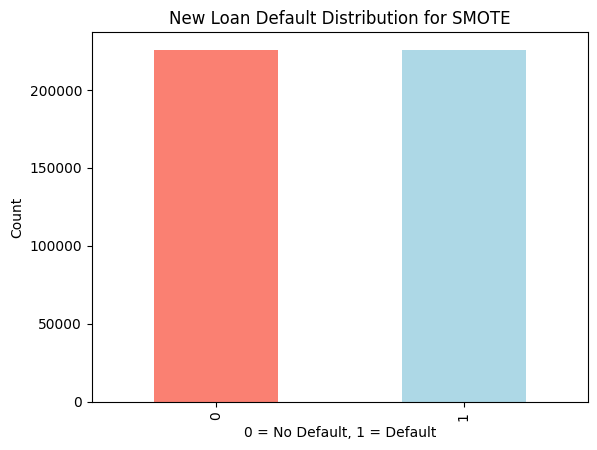

In [80]:
yTrainSM.value_counts().plot(kind="bar", color=["salmon", "lightblue"], title="New Loan Default Distribution for SMOTE", 
                                        xlabel="0 = No Default, 1 = Default",
                                        ylabel="Count");

In [89]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           255347 non-null  float64
 1   Income                        255347 non-null  float64
 2   LoanAmount                    255347 non-null  float64
 3   CreditScore                   255347 non-null  float64
 4   MonthsEmployed                255347 non-null  float64
 5   NumCreditLines                255347 non-null  float64
 6   InterestRate                  255347 non-null  float64
 7   LoanTerm                      255347 non-null  float64
 8   DTIRatio                      255347 non-null  float64
 9   HasMortgage                   255347 non-null  int64  
 10  HasDependents                 255347 non-null  int64  
 11  HasCoSigner                   255347 non-null  int64  
 12  Default                       255347 non-nul

In [93]:
xTrainSM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451388 entries, 0 to 451387
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           451388 non-null  float64
 1   Income                        451388 non-null  float64
 2   LoanAmount                    451388 non-null  float64
 3   CreditScore                   451388 non-null  float64
 4   MonthsEmployed                451388 non-null  float64
 5   NumCreditLines                451388 non-null  float64
 6   InterestRate                  451388 non-null  float64
 7   LoanTerm                      451388 non-null  float64
 8   DTIRatio                      451388 non-null  float64
 9   HasMortgage                   451388 non-null  int64  
 10  HasDependents                 451388 non-null  int64  
 11  HasCoSigner                   451388 non-null  int64  
 12  Education_Bachelor's          451388 non-nul

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [83]:
# ## Install  xgboost and lightgbm
# !pip install xgboost
# # !pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Use Different Machine Learning Models for Predicting, selecting best model for final prediction

In [85]:
#import ML model
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

#### Define X and Y train data and Train Test data split into training and testing

In [87]:
## Define X and Y train data and Train Test data split into training and testing
X_train, X_test, y_train, y_test = train_test_split(xTrainSM, yTrainSM, test_size=0.2, random_state=42)

In [88]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361110, 28), (90278, 28), (361110,), (90278,))

### RandomForest Model 

In [94]:
maxDepth = 7#10
rfc = RandomForestClassifier(n_estimators=100, 
                            class_weight='balanced', 
                            random_state=42, 
                            n_jobs=-1, verbose=1)

In [95]:
# Random forest train 
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.1s finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42,
                       verbose=1)

In [97]:
# Random forest predict
evalRF = rfc.predict(X_test)
evalRFProb = rfc.predict_proba(X_test)[:,1] # get the probability of the positive class

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.2s finished


In [98]:
reportClassificationRF = classification_report(y_test, evalRF)
print(reportClassificationRF)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92     45127
           1       0.94      0.90      0.92     45151

    accuracy                           0.92     90278
   macro avg       0.92      0.92      0.92     90278
weighted avg       0.92      0.92      0.92     90278



In [99]:
rfc_auc = roc_auc_score(y_test, evalRFProb)
rfc_fpr, rfc_tpr, rfc_th = roc_curve(y_test, evalRFProb)
rfc_auc

0.9744023142889207

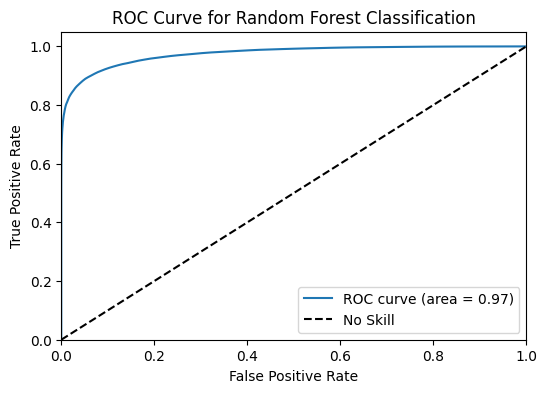

In [100]:
plt.figure(figsize=(6, 4))
plt.plot(rfc_fpr, rfc_tpr, label='ROC curve (area = %0.2f)' % rfc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classification')
plt.legend()
plt.show()

## Select best model for generate test results

In [108]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
# predicted_probability = dummy_clf.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]
predicted_probability = rfc.predict_proba(test_df.drop(['LoanID'], axis=1))[:, 1]

[Parallel(n_jobs=24)]: Using backend ThreadingBackend with 24 concurrent workers.
[Parallel(n_jobs=24)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=24)]: Done 100 out of 100 | elapsed:    0.2s finished


In [109]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [110]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.12
1,JDL5RH07AM,0.06
2,STAL716Y79,0.12
3,SO0KKJ3IQB,0.27
4,T99CWTYDCP,0.30
5,0SNHFWV4UP,0.15
6,S6ITP6LGYS,0.12
7,A6I7U12IRJ,0.23
8,8W6KY50JU4,0.15
9,THFQ08OLMU,0.14


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [111]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [112]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [113]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [114]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [115]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!